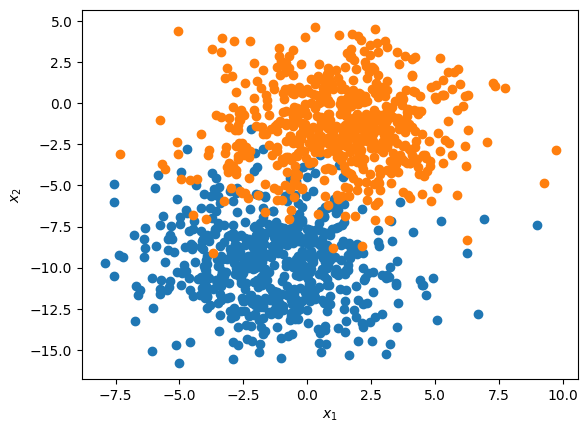

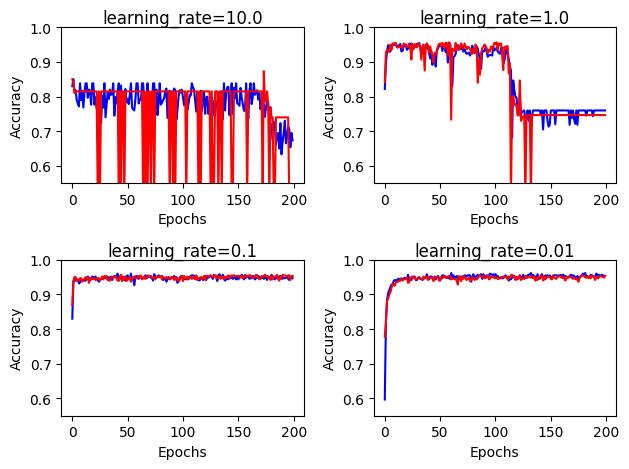

In [1]:
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from numpy import where

# Part 1: Creating pseudo-random dataset & display with scatter plot
Nclass = 2
# generate 2d dataset for classification
X, y = make_blobs(n_samples=1200, centers=Nclass,
                  n_features=2, cluster_std=2.5, random_state=2)
plt.figure(1)
# Display dataset with scatter plot for each class value
for class_value in range(Nclass):
    # select indices of points with the class label
    row_ix = where(y == class_value)
    # scatter plot for points with a different color
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.xlabel(r"$x_1$"), plt.ylabel(r"$x_2$")
plt.show()  # show scatter plot

# Part 2: Preparing training dataset and testing dataset
def prepare_data():
    # generate 2d dataset for classification
    X, y = make_blobs(n_samples=1200, centers=Nclass,
                      n_features=2, cluster_std=2.5, random_state=2)
    # encode output variable to either group1 or group2
    y = to_categorical(y)
    # Using first n_train sample for the training dataset
    n_train = 600
    trainX, testX = X[:n_train, :], X[n_train:, :]
    # Using the rest for the testing dataset
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

# Part 3: Training the MLP network & evaluate its accuracy for both Train/Test datasets
def fit_model(trainX, trainy, testX, testy, learning_rate):
    # Defining a simple MLP model that expects two input variables
    model = Sequential()
    # A single hidden layer with 50 nodes
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    # An output layer with 2 nodes to predict probability for each of 2 classes
    model.add(Dense(2, activation='softmax'))
    # compile model
    opt = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    # Model will be fitted for 200 training epochs
    history = model.fit(trainX, trainy,
                        validation_data=(testX, testy), epochs=200, verbose=0)
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train', color='b')
    plt.plot(history.history['val_accuracy'], label='test', color='r')
    plt.title('learning_rate=' + str(learning_rate), pad=-50)
    plt.ylim([0.55, 1.0]), plt.xlabel('Epochs'), plt.ylabel('Accuracy')

# Main Program:
# prepare training and testing datasets
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different learning rates
learning_rates = [1E1, 1E-0, 1E-1, 1E-2]
for i in range(len(learning_rates)):
    # assign different plot number
    plot_no = (i + 1)
    plt.subplot(2, 2, plot_no)
    # Training MLP model and plot learning curves for a learning rate
    fit_model(trainX, trainy, testX, testy, learning_rates[i])
# show learning curves
plt.tight_layout()  # Adjust layout for subplots
plt.show()